In [104]:
#import the liabaries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [105]:
df =pd.read_csv("D:\\client\\project 8\\all_upwork_jobs.csv")
df

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,NaN,NaN,500.0,NaN
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,NaN,NaN,1100.0,United States
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.0,30.0,NaN,United States
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,True,NaN,NaN,NaN,United States
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,False,NaN,NaN,650.0,India
...,...,...,...,...,...,...,...,...
244823,Need Facebook advertising experts to launch pr...,https://www.upwork.com/jobs/Need-Facebook-adve...,2024-03-24 13:28:38+00:00,True,20.0,100.0,NaN,Zambia
244824,Digital/Telemarketing/Sales/OutSide Sales,https://www.upwork.com/jobs/Digital-Telemarket...,2024-03-24 13:40:52+00:00,False,NaN,NaN,100.0,Sri Lanka
244825,WordPress Template Edits,https://www.upwork.com/jobs/WordPress-Template...,2024-03-24 13:37:50+00:00,True,5.0,30.0,NaN,United States
244826,ELEMENTOR PRO For quick fix (Wordpress),https://www.upwork.com/jobs/ELEMENTOR-PRO-For-...,2024-03-24 13:52:15+00:00,False,NaN,NaN,15.0,France


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244828 entries, 0 to 244827
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   title           244827 non-null  object 
 1   link            244827 non-null  object 
 2   published_date  244828 non-null  object 
 3   is_hourly       244828 non-null  bool   
 4   hourly_low      102422 non-null  float64
 5   hourly_high     98775 non-null   float64
 6   budget          103891 non-null  float64
 7   country         239751 non-null  object 
dtypes: bool(1), float64(3), object(4)
memory usage: 13.3+ MB


In [107]:
df.isnull().sum()

title                  1
link                   1
published_date         0
is_hourly              0
hourly_low        142406
hourly_high       146053
budget            140937
country             5077
dtype: int64

In [108]:
#Convert 'published_date' to datetime
df['published_date'] = pd.to_datetime(df['published_date'])
df.head()

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,NaN,NaN,500.0,NaN
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,NaN,NaN,1100.0,United States
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.0,30.0,NaN,United States
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,True,NaN,NaN,NaN,United States
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,False,NaN,NaN,650.0,India


#### Convert date format to 'YYYYMMDD'

In [109]:

#df['published_date'] = pd.to_datetime(df['published_date']).dt.strftime('%Y%m%d%H%M%S')
#df.head()

In [110]:
# replacing na values 
df ["title"].fillna( method ='ffill', limit = 1, inplace = True)
df.isnull().sum()

title                  0
link                   1
published_date         0
is_hourly              0
hourly_low        142406
hourly_high       146053
budget            140937
country             5077
dtype: int64

In [111]:
# replacing na values in title with No link
df["link"].fillna("No link", inplace = True)
df.isnull().sum()

title                  0
link                   0
published_date         0
is_hourly              0
hourly_low        142406
hourly_high       146053
budget            140937
country             5077
dtype: int64

### Fill the null values for numerical columns

In [112]:
# Select numerical columnsnumerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# to fill missing values with mean or median
def fill_missing_values(data, columns, strategy='mean'):
    if strategy == 'mean':
        for col in columns:
            df[col].fillna(data[col].mean(), inplace=True)
    elif strategy == 'median':
        for col in columns:
            df[col].fillna(data[col].median(), inplace=True)

            # Filling missing values with median
fill_missing_values(df, numerical_cols, strategy='median')

# Check there are no more missing values in the numerical columns
missing_values = df[numerical_cols].isnull().sum()
print(missing_values)

hourly_low     0
hourly_high    0
budget         0
dtype: int64


### Fill the null values for categorical columns

In [113]:
# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Fill missing values with mode for each categorical column
for col in categorical_cols:
    mode_value = df[col].mode()[0]  # Calculate the mode for the column
    df[col].fillna(mode_value, inplace=True)  # Fill missing values with the mode

# Verify that there are no more missing values in the categorical columns
df.isnull().sum()

title             0
link              0
published_date    0
is_hourly         0
hourly_low        0
hourly_high       0
budget            0
country           0
dtype: int64

In [114]:
df.duplicated().sum()

0

In [115]:
# Renaming columns

df = df.rename(columns={
    'published_date': 'publisheddate',
    'is_hourly': 'ishourly',
    'hourly_low': 'hourlylow',
    'hourly_high': 'hourlyhigh'  
    })

df.head()

,title,link,publisheddate,ishourly,hourlylow,hourlyhigh,budget,country
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,15.0,30.0,500.0,United States
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,15.0,30.0,1100.0,United States
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.0,30.0,100.0,United States
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,True,15.0,30.0,100.0,United States
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,False,15.0,30.0,650.0,India


In [116]:
# Drop rows with missing values in key columns
df.dropna(subset=['title', 'country', 'hourlylow', 'hourlyhigh', 'budget' ], inplace=True)
df.head()

,title,link,publisheddate,ishourly,hourlylow,hourlyhigh,budget,country
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,15.0,30.0,500.0,United States
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,15.0,30.0,1100.0,United States
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.0,30.0,100.0,United States
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,True,15.0,30.0,100.0,United States
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,False,15.0,30.0,650.0,India


In [117]:
# Display basic statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
           hourlylow     hourlyhigh          budget
count  244828.000000  244828.000000   244828.000000
mean       15.978773      34.829501      444.342967
std        11.789481      30.955729    10254.421295
min         3.000000       3.000000        5.000000
25%        15.000000      30.000000      100.000000
50%        15.000000      30.000000      100.000000
75%        15.000000      30.000000      100.000000
max       998.000000     999.000000  1000000.000000


###  Insights:

##### Both hourlylow and hourlyhigh show a strong concentration at 15 and 30, respectively, while budget clusters at 100.

####  The maximum values for all three variables (especially budget) are unusually high, indicating possible outliers or rare cases.
####  The small difference between the 25th, 50th, and 75th percentiles for all variables suggests a highly skewed distribution with a few very large values inflating the mean.

In [118]:
# Group countries into "Top N" and "Others"
top_n = 20  # Adjust this to show more or fewer countries
top_countries = df['country'].value_counts().head(top_n).index

####  Create a new column to group countries

In [119]:

df['Country_Grouped'] = df['country'].apply(lambda x: x if x in top_countries else 'Others')


#### Average Salary by Grouped Country

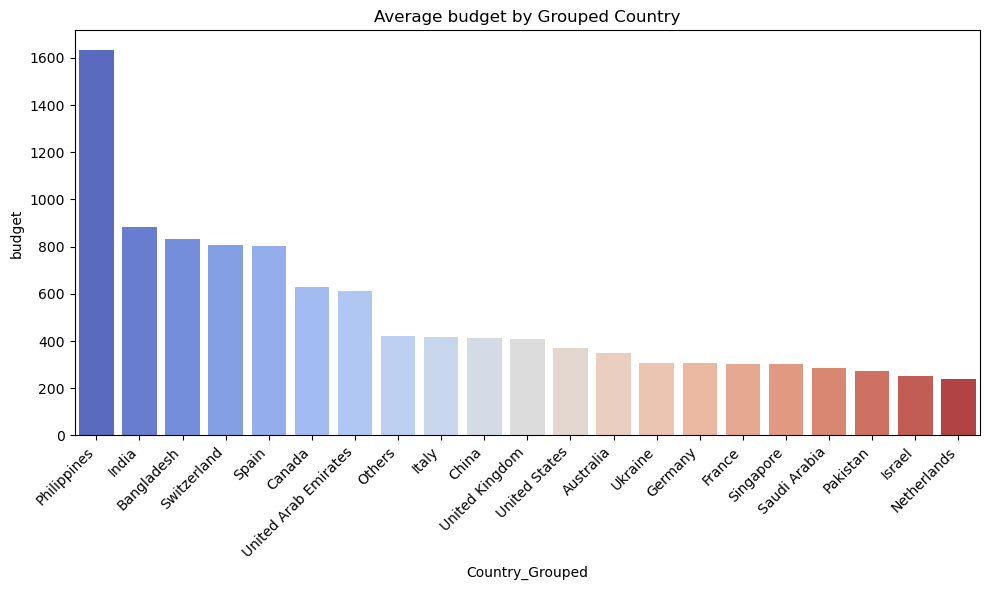

In [120]:
# 1. Bar Chart: Average Salary by Grouped Country
grouped_country_salary = df.groupby('Country_Grouped')['budget'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_country_salary, x='Country_Grouped', y='budget', palette='coolwarm')
plt.title('Average budget by Grouped Country')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### Countries like the Philippines and India might represent regions with higher investment or higher-priced projects.
##### Countries at the lower end may have more conservative budgets or projects with smaller allocations

### Proportion of Jobs by Grouped Country

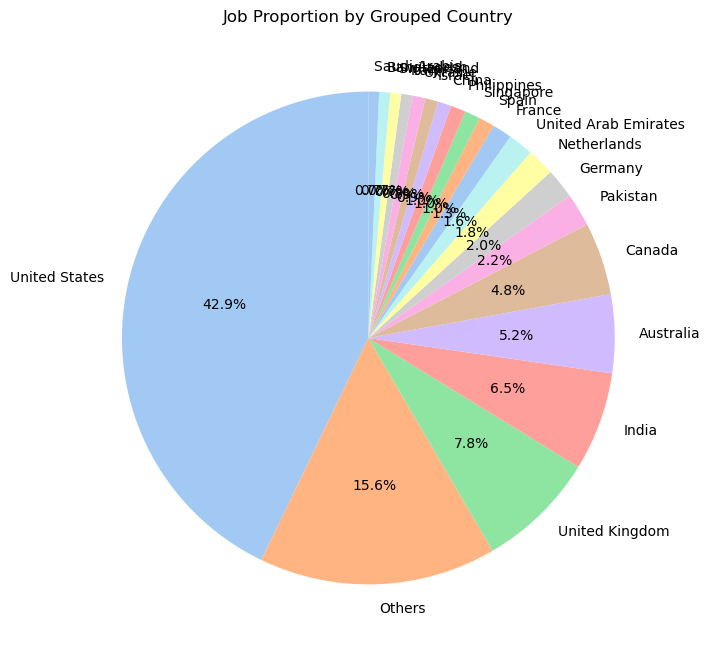

In [121]:
country_counts = df['Country_Grouped'].value_counts()
plt.figure(figsize=(8, 8))
country_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Job Proportion by Grouped Country')
plt.ylabel('')
plt.show()

##### 1.  United States Dominance: The United States accounts for 42.9% of all jobs, indicating its significant role in the dataset, likely due to a larger market or higher demand.

#### 2.  Top Contributors: After the U.S., Others (15.6%), United Kingdom (7.8%), India (6.5%), and Australia (5.2%) collectively represent substantial shares, showing a diverse distribution.

#### 3.  Smaller Segments: Countries like Canada, Pakistan, and Germany contribute 2-4% each, while many countries (e.g., UAE, Netherlands) have minimal shares (<2%), indicating more niche job allocations.


Remote Work Feature Distribution:
Remote_Work
Onsite    243470
Remote      1358
Name: count, dtype: int64


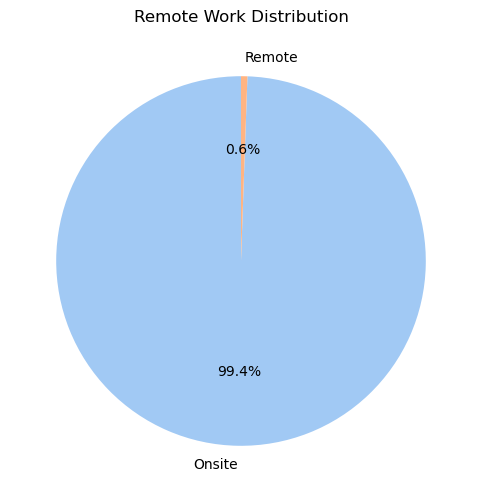

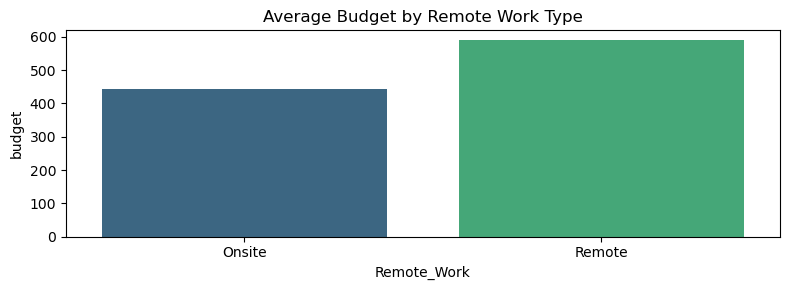

In [122]:
# Define a function to classify remote work based on keywords in the title
def classify_remote_work(title):
    if pd.isnull(title):
        return 'Unknown'
    title_lower = title.lower()
    if 'remote' in title_lower or 'work from home' in title_lower or 'telecommute' in title_lower:
        return 'Remote'
    else:
        return 'Onsite'

# Apply the function to create a new Remote_Work column
df['Remote_Work'] = df['title'].apply(classify_remote_work)

# Inspect the Remote_Work feature
print("\nRemote Work Feature Distribution:")
print(df['Remote_Work'].value_counts())

# --- Visualizations ---

# 1. Pie Chart: Distribution of Remote Work
remote_work_counts = df['Remote_Work'].value_counts()
plt.figure(figsize=(6, 6))
remote_work_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Remote Work Distribution')
plt.ylabel('')
plt.show()

# 2. Bar Chart: Average Budget by Remote Work Type
remote_work_budget = df.groupby('Remote_Work')['budget'].mean().reset_index()
plt.figure(figsize=(8, 3))
sns.barplot(data=remote_work_budget, x='Remote_Work', y='budget', palette='viridis')
plt.title('Average Budget by Remote Work Type')
plt.tight_layout()
plt.show()

#### Creating boxplot to find the outliers

In [123]:
df.dropna(subset=['hourlylow', 'hourlyhigh', 'title'], inplace=True)

### average hourly rate

In [124]:

df['average_hourly'] = (df['hourlylow'] + df['hourlyhigh']) / 2

In [125]:
from sklearn.feature_extraction.text import CountVectorizer

### Extract keywords from job titles

In [126]:

vectorizer = CountVectorizer(stop_words='english', max_features=20)
keywords_matrix = vectorizer.fit_transform(df['title'])
keywords_df = pd.DataFrame(keywords_matrix.toarray(), columns=vectorizer.get_feature_names_out())

### Combine keywords with salary data

In [127]:

analysis_df = pd.concat([df[['average_hourly']], keywords_df], axis=1)
analysis_df.head()

,average_hourly,amp,app,create,data,design,designer,developer,editor,expert,...,manager,marketing,media,need,needed,social,specialist,video,website,youtube
0,22.5,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,22.5,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22.5,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,22.5,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [128]:
# Correlation analysis
correlations = analysis_df.corr()['average_hourly'].sort_values(ascending=False)
print("Top correlated keywords with salary:")
print(correlations.head(10))

Top correlated keywords with salary:
average_hourly    1.000000
expert            0.024366
needed            0.010119
developer         0.006093
marketing         0.000791
need             -0.001382
design           -0.004169
looking          -0.005276
amp              -0.006184
designer         -0.006323
Name: average_hourly, dtype: float64


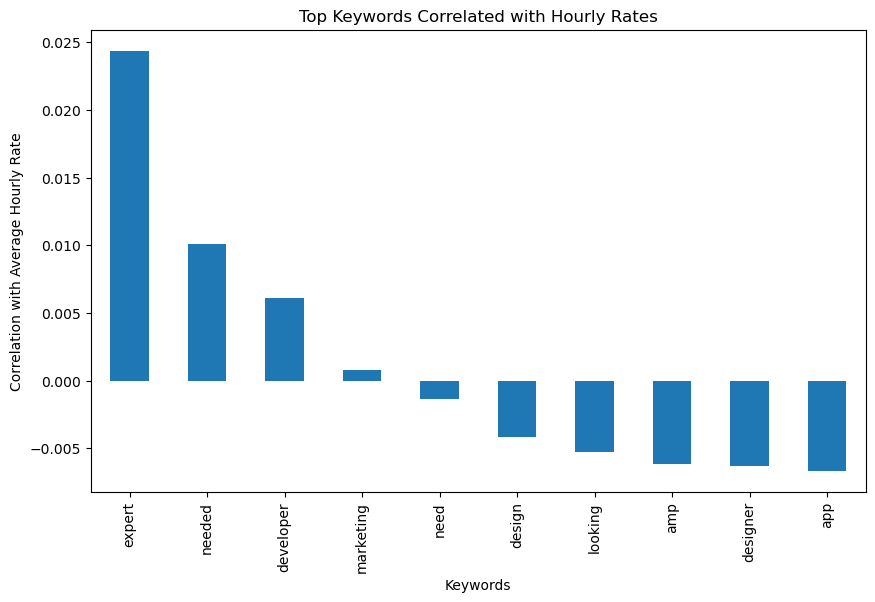

In [129]:
# Visualization
correlations[1:11].plot(kind='bar', figsize=(10, 6), title='Top Keywords Correlated with Hourly Rates')
plt.xlabel('Keywords')
plt.ylabel('Correlation with Average Hourly Rate')
plt.show()

### Comments

##### Strong link to hourly pay: "Average hourly" is highly correlated with salary. This shows jobs mentioning hourly pay rates are directly linked to wages.

##### Skills have some impact: Keywords like "expert" or "developer" slightly affect salary. These roles may offer higher pay but not significantly.

##### General words don’t matter much: Terms like "design" or "looking" have little connection to salary. They are common but not linked to pay details.

In [130]:
df.head()

,title,link,publisheddate,ishourly,hourlylow,hourlyhigh,budget,country,Country_Grouped,Remote_Work,average_hourly
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,15.0,30.0,500.0,United States,United States,Onsite,22.5
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,15.0,30.0,1100.0,United States,United States,Onsite,22.5
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.0,30.0,100.0,United States,United States,Onsite,20.0
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,True,15.0,30.0,100.0,United States,United States,Onsite,22.5
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,False,15.0,30.0,650.0,India,India,Onsite,22.5


# Task2


####  time-based features

In [131]:
# Ensure `publisheddate` is a datetime object
#df['publisheddate'] = pd.to_datetime(df['publisheddate'])


df['year'] = df['publisheddate'].dt.year
df['month'] = df['publisheddate'].dt.to_period('M')
df['day'] = df['publisheddate'].dt.day
df['is_even_day'] = df['day'] % 2 == 0

### we calculate even days for 

##### 1.  To analyze if job postings are more frequent on even days compared to odd days.
##### 2.  Indicate a posting pattern.
##### 3.  Useful for identifying daily trends in job postings

#### caluclate the count posting ( aggregates the dataset (df) to count the number of job postings for each unique combination )

#### job categories based on keywords

In [173]:

def categorize_job(title):
    title = title.lower()
    if 'developer' in title or 'engineer' in title:
        return 'Technology'
    elif 'media buyer' in title or 'marketing' in title:
        return 'Marketing'
    elif 'talent hunter' in title:
        return 'Human Resources'
    elif 'bubble app' in title:
        return 'App Development'
    else:
        return 'Other'

# Apply categorization
df['job_category'] = df['title'].apply(categorize_job)

# Display the updated DataFrame
print(df[['title', 'job_category']])

                                                    title     job_category
0       Experienced Media Buyer For Solar Pannel and R...        Marketing
1                                    Full Stack Developer       Technology
2                                         SMMA Bubble App  App Development
3                  Talent Hunter Specialized in Marketing        Marketing
4                                           Data Engineer       Technology
...                                                   ...              ...
244823  Need Facebook advertising experts to launch pr...            Other
244824          Digital/Telemarketing/Sales/OutSide Sales        Marketing
244825                           WordPress Template Edits            Other
244826            ELEMENTOR PRO For quick fix (Wordpress)            Other
244827              Creating a UGC Ad for Our Mobile Game            Other

[244828 rows x 2 columns]


In [174]:

category_trends = df.groupby(['job_category', 'month']).size().reset_index(name='posting_count')

In [175]:
category_trends

,job_category,month,posting_count
0,App Development,2024-02,12
1,App Development,2024-03,9
2,Human Resources,2024-02,1
3,Marketing,2023-12,1
4,Marketing,2024-01,3
5,Marketing,2024-02,3649
6,Marketing,2024-03,5314
7,Other,2023-11,1
8,Other,2023-12,9
9,Other,2024-01,86


In [134]:
df.head()

,title,link,publisheddate,ishourly,hourlylow,hourlyhigh,budget,country,Country_Grouped,Remote_Work,average_hourly,year,month,day,is_even_day
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,15.0,30.0,500.0,United States,United States,Onsite,22.5,2024,2024-02,17,False
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,15.0,30.0,1100.0,United States,United States,Onsite,22.5,2024,2024-02,17,False
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.0,30.0,100.0,United States,United States,Onsite,20.0,2024,2024-02,17,False
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,True,15.0,30.0,100.0,United States,United States,Onsite,22.5,2024,2024-02,17,False
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,False,15.0,30.0,650.0,India,India,Onsite,22.5,2024,2024-02,17,False


### remove gap in time series

In [177]:

all_months = pd.period_range(start=category_trends['month'].min(), 
                             end=category_trends['month'].max(), freq='M')
all_titles = category_trends['job_category'].unique()
all_combinations = pd.MultiIndex.from_product([all_titles, all_months], names=['job_category', 'month'])
category_trends = category_trends.set_index(['job_category', 'month']).reindex(all_combinations, fill_value=0).reset_index()

In [178]:
category_trends

,job_category,month,posting_count
0,App Development,2023-11,0
1,App Development,2023-12,0
2,App Development,2024-01,0
3,App Development,2024-02,12
4,App Development,2024-03,9
5,Human Resources,2023-11,0
6,Human Resources,2023-12,0
7,Human Resources,2024-01,0
8,Human Resources,2024-02,1
9,Human Resources,2024-03,0


#### Optimize growth rate calculation using vectorized operations

####   calculates the percentage growth rate in job postings for each job title across the months

#### useful for 
#### 1.  Identify Growth Trends:
#### 2.  Highlight Emerging Categories:
#### 3.  Time-Series Analysis:

In [179]:

category_trends['posting_growth_rate'] = category_trends.groupby('job_category')['posting_count'].pct_change() * 100

### Emerging job categories 
##### 1.  Emerging trends are typically evaluated based on the most recent data.
##### 2.  Extracts only the rows corresponding to the most recent month containing job titles and their statistics for the latest month.
##### 3.  Categories with higher growth rates are considered more "emerging."
##### 4. Displays the ranked list of emerging job categories.


In [181]:

recent_month = category_trends['month'].max()
emerging_categories = category_trends[category_trends['month'] == recent_month]
emerging_categories = emerging_categories.sort_values(by='posting_growth_rate', ascending=False)

# Filter for significant growth (e.g., growth rate > 0 and posting_count > 10)
emerging_categories = emerging_categories[(emerging_categories['posting_growth_rate'] > 0) & 
                                           (emerging_categories['posting_count'] > 10)]

# Ranked list of emerging job categories
ranked_emerging_categories = emerging_categories[['job_category', 'posting_count', 'posting_growth_rate']]
print("Ranked Emerging Job Categories:\n", ranked_emerging_categories)


Ranked Emerging Job Categories:
    job_category  posting_count  posting_growth_rate
14    Marketing           5314            45.628939
24   Technology          11506            43.986985
19        Other         126005            39.642485


#### Time series chart

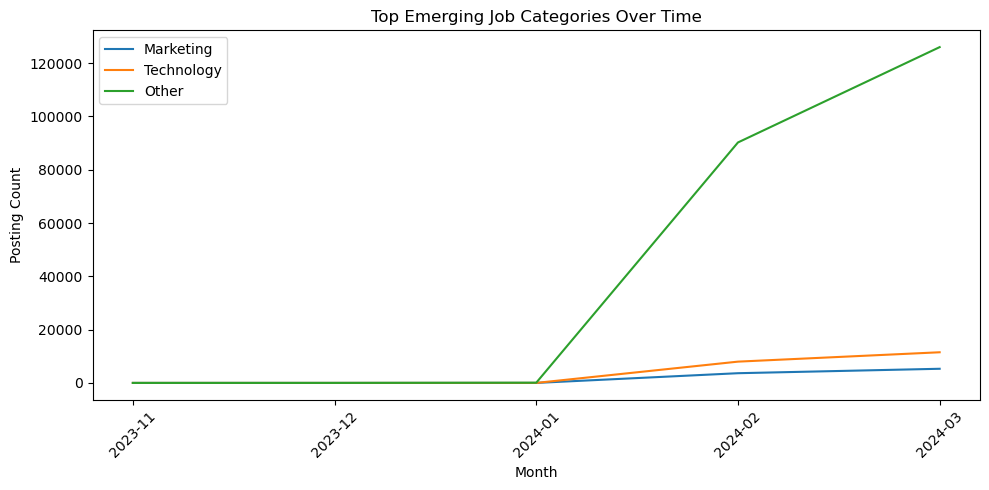

In [182]:

top_categories = ranked_emerging_categories['job_category'].head(5).tolist()
plt.figure(figsize=(10, 5))
for category in top_categories:
    category_data = category_trends[category_trends['job_category'] == category]
    plt.plot(category_data['month'].astype(str), category_data['posting_count'], label=category)

plt.title('Top Emerging Job Categories Over Time')
plt.xlabel('Month')
plt.ylabel('Posting Count')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Task 3

In [141]:
df = df.rename(columns={
    'Country_Grouped': 'CountryGrouped',
    'Remote_Work': 'RemoteWork',
    'average_hourly': 'averagehourly',
   
    })

df.head()

,title,link,publisheddate,ishourly,hourlylow,hourlyhigh,budget,country,CountryGrouped,RemoteWork,averagehourly,year,month,day,is_even_day,job_category
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,15.0,30.0,500.0,United States,United States,Onsite,22.5,2024,2024-02,17,False,Marketing
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,15.0,30.0,1100.0,United States,United States,Onsite,22.5,2024,2024-02,17,False,Technology
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.0,30.0,100.0,United States,United States,Onsite,20.0,2024,2024-02,17,False,App Development
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,True,15.0,30.0,100.0,United States,United States,Onsite,22.5,2024,2024-02,17,False,Marketing
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,False,15.0,30.0,650.0,India,India,Onsite,22.5,2024,2024-02,17,False,Technology


In [142]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [143]:
# Group by Country_Grouped, Remote_Work, role, and time to get demand
demand_data = df.groupby(['title', 'CountryGrouped', 'RemoteWork', 'year', 'month'])['title'].count().reset_index(name='demand')

In [144]:
# Pivot table to reshape for modeling, considering Country_Grouped and Remote_Work
pivot_data = demand_data.pivot_table(index=['year', 'month', 'CountryGrouped', 'RemoteWork'], columns='title', values='demand', fill_value=0)

# Prepare features and labels
X = pivot_data.reset_index().drop(columns=['year', 'month', 'CountryGrouped', 'RemoteWork'])
y = pivot_data.sum(axis=1)  # Summing demand across roles as target variable


In [145]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [146]:
# Model: RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [147]:
# Evaluate model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

RMSE: 328.8029676949404
R-squared: 0.9532490731343182


##### RMSE (Root Mean Squared Error): The model's predictions deviate from the actual values by an average of approximately 329 units. An RMSE of 329 might be acceptable because it represents a relatively small error compared to the scale of the predictions.

##### R-squared (Coefficient of Determination): The model explains 95.3% of the variance in job demand, showcasing its high accuracy and strong fit to the data trends.

##### Conclusion:
##### The RMSE seems acceptable in this case, as the high R-squared indicates strong model performance. However, you should compare the RMSE to the mean or range of the target variable to confirm.

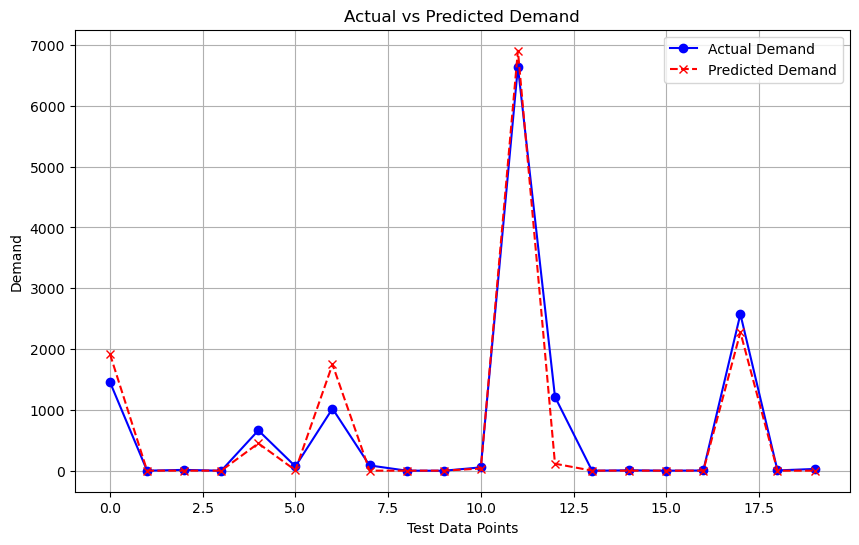

In [148]:
# Visualize Demand Predictions by Job Role (Line Chart)
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label="Actual Demand", marker='o', linestyle='-', color='blue')
plt.plot(y_pred, label="Predicted Demand", marker='x', linestyle='--', color='red')
plt.title("Actual vs Predicted Demand")
plt.xlabel("Test Data Points")
plt.ylabel("Demand")
plt.legend()
plt.grid(True)
plt.show()

#### Actual vs Predicted Demand:

The blue line represents the actual demand observed in the dataset.

The red dashed line with markers represents the predicted demand generated by the model.

### Observations:
The model performs well in capturing trends, with the predicted demand closely following the actual demand for most data points.
For certain peaks (e.g., around the 12th data point), the model slightly overestimates demand, but the overall pattern aligns well.

### Conclusion:
The chart indicates that the model effectively predicts demand, as the lines are closely aligned, showing high accuracy in identifying trends and magnitudes.
Small deviations suggest areas where the model can be further optimized, but overall, it demonstrates strong performance.

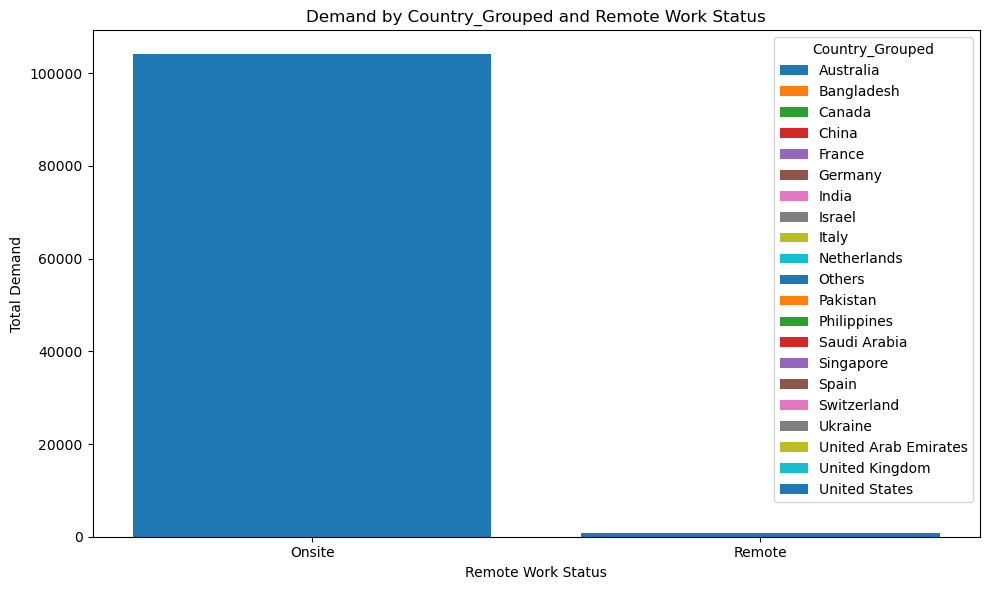

In [149]:
# Visualize demand by Country_Grouped and Remote_Work status (Bar Chart)
country_remote_demand = demand_data.groupby(['CountryGrouped', 'RemoteWork'])['demand'].sum().reset_index()

plt.figure(figsize=(10, 6))
for country in country_remote_demand['CountryGrouped'].unique():
    country_data = country_remote_demand[country_remote_demand['CountryGrouped'] == country]
    plt.bar(country_data['RemoteWork'], country_data['demand'], label=f'{country}')

plt.title("Demand by Country_Grouped and Remote Work Status")
plt.xlabel("Remote Work Status")
plt.ylabel("Total Demand")
plt.legend(title="Country_Grouped")
plt.tight_layout()
plt.show()

### This bar chart illustrates the total job demand categorized by Country_Grouped and Remote Work Status (Onsite vs. Remote). Here's the explanation:

##### Demand Distribution:
The majority of job demand is concentrated in Onsite roles, as represented by the large blue bar.
Remote roles account for a significantly smaller portion of the demand, almost negligible in comparison to onsite roles.
Country Breakdown:

The legend indicates that the demand is further grouped by countries, but in this chart, it seems that the aggregated total demand is visualized rather than being broken down by individual countries.

##### Conclusion:
Onsite job roles dominate the market, while remote roles have much less demand. This could reflect regional preferences or limitations for remote work opportunities.

In [150]:
df.head()

,title,link,publisheddate,ishourly,hourlylow,hourlyhigh,budget,country,CountryGrouped,RemoteWork,averagehourly,year,month,day,is_even_day,job_category
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,15.0,30.0,500.0,United States,United States,Onsite,22.5,2024,2024-02,17,False,Marketing
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,15.0,30.0,1100.0,United States,United States,Onsite,22.5,2024,2024-02,17,False,Technology
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.0,30.0,100.0,United States,United States,Onsite,20.0,2024,2024-02,17,False,App Development
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,True,15.0,30.0,100.0,United States,United States,Onsite,22.5,2024,2024-02,17,False,Marketing
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,False,15.0,30.0,650.0,India,India,Onsite,22.5,2024,2024-02,17,False,Technology


# Task 4

In [151]:
df['CountryGrouped'] = df['CountryGrouped'].astype(str)

#### Aggregate by CountryGrouped

In [152]:
# Aggregated metrics by CountryGrouped
grouped_metrics = df.groupby('CountryGrouped').agg({
    'averagehourly': 'mean',
    'budget': 'sum',
    'hourlylow': 'mean',
    'hourlyhigh': 'mean'
}).reset_index()
grouped_metrics.rename(columns={
    'averagehourly': 'avg_hourly_salary',
    'budget': 'total_budget',
    'hourlylow': 'avg_hourly_low',
    'hourlyhigh': 'avg_hourly_high'
}, inplace=True)

In [153]:
print(grouped_metrics.head())

  CountryGrouped  avg_hourly_salary  total_budget  avg_hourly_low  \
0      Australia          23.347995     4423997.0       14.662149   
1     Bangladesh          26.111205     1469897.0       14.654216   
2         Canada          24.389089     7319037.0       14.899897   
3          China          23.979833      890143.0       15.592490   
4         France          23.824534      955373.0       14.457477   

   avg_hourly_high  
0        32.033841  
1        37.568195  
2        33.878281  
3        32.367177  
4        33.191590  


#### Analyze RemoteWork Impact

In [154]:
# Aggregate metrics by RemoteWork
remote_work_metrics = df.groupby('RemoteWork').agg({
    'averagehourly': 'mean',
    'budget': 'sum',
    'hourlylow': 'mean',
    'hourlyhigh': 'mean'
}).reset_index()
remote_work_metrics.rename(columns={
    'averagehourly': 'avg_hourly_salary',
    'budget': 'total_budget',
    'hourlylow': 'avg_hourly_low',
    'hourlyhigh': 'avg_hourly_high'
}, inplace=True)

#### Visualize Average Salary by CountryGrouped

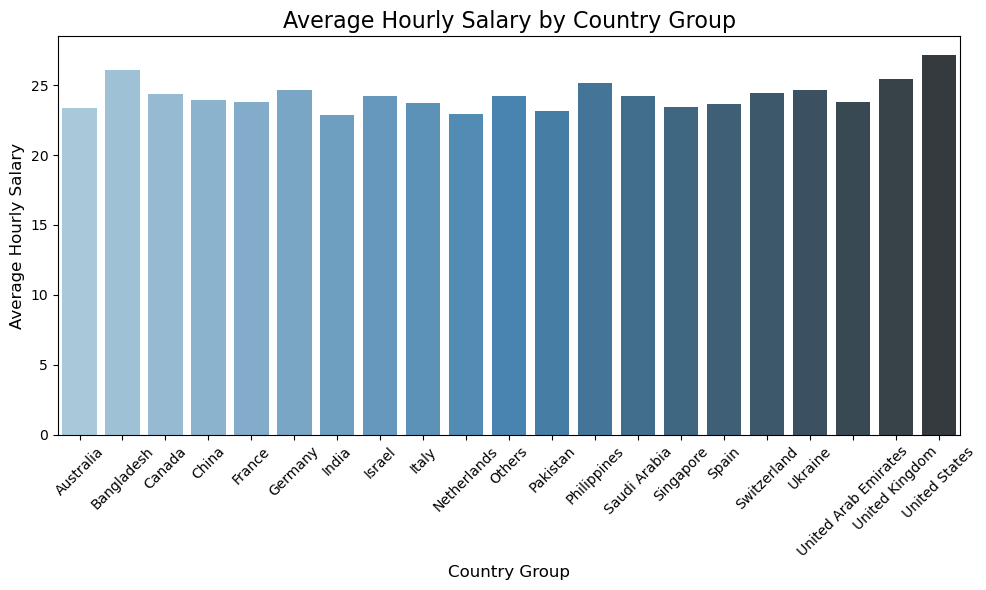

In [155]:
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_metrics, x='CountryGrouped', y='avg_hourly_salary', palette='Blues_d')
plt.title('Average Hourly Salary by Country Group', fontsize=16)
plt.xlabel('Country Group', fontsize=12)
plt.ylabel('Average Hourly Salary', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Budget Distribution by CountryGrouped

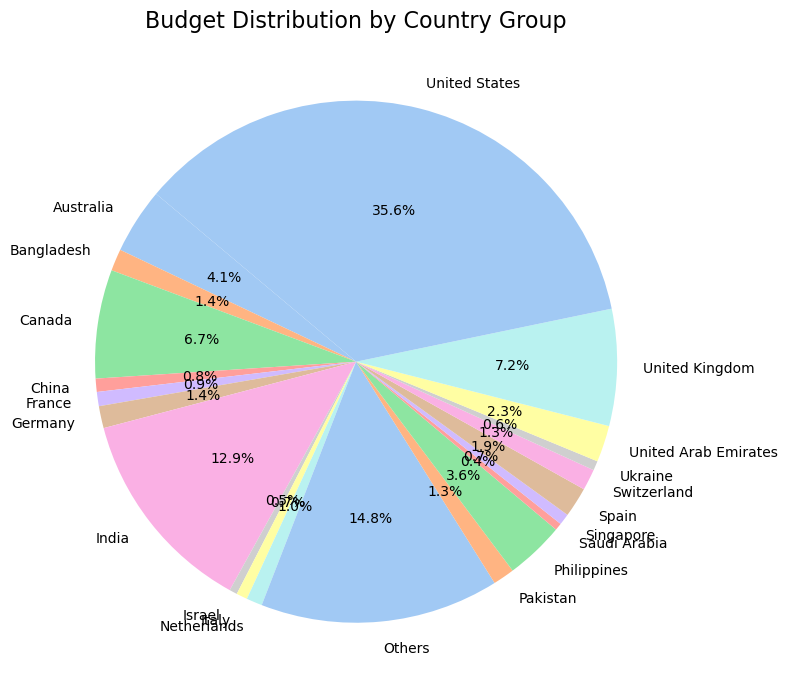

In [156]:
plt.figure(figsize=(8, 8))
plt.pie(grouped_metrics['total_budget'], labels=grouped_metrics['CountryGrouped'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Budget Distribution by Country Group', fontsize=16)
plt.tight_layout()
plt.show()

#### Salary Comparison by RemoteWork

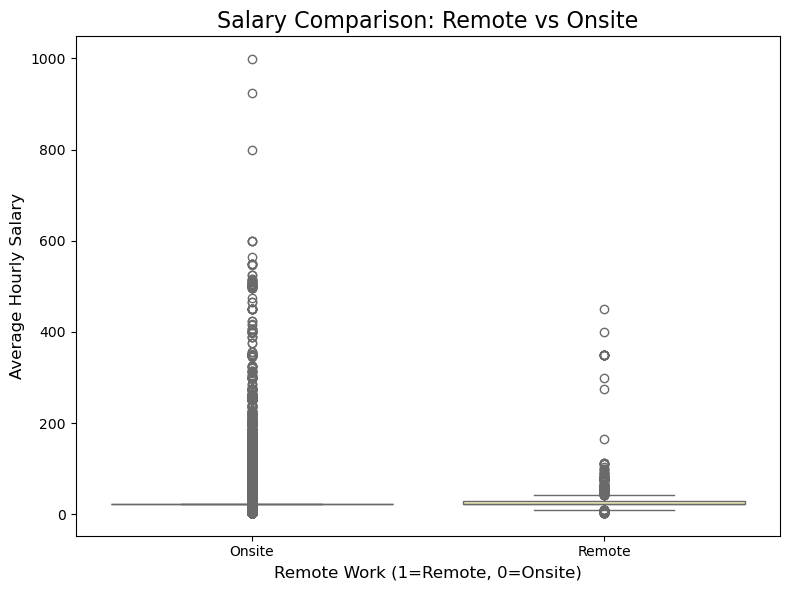

In [157]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='RemoteWork', y='averagehourly', palette='Set3')
plt.title('Salary Comparison: Remote vs Onsite', fontsize=16)
plt.xlabel('Remote Work (1=Remote, 0=Onsite)', fontsize=12)
plt.ylabel('Average Hourly Salary', fontsize=12)
plt.tight_layout()
plt.show()

#### Analyze Salary by CountryGrouped and RemoteWork

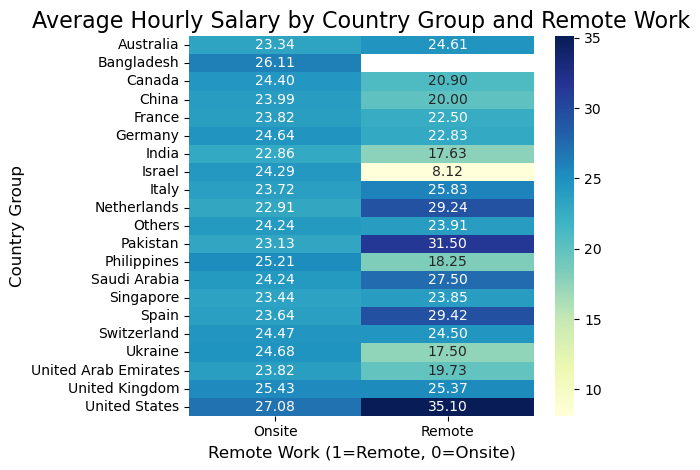

In [158]:
# Group by CountryGrouped and RemoteWork
grouped_remote_metrics = df.groupby(['CountryGrouped', 'RemoteWork']).agg({
    'averagehourly': 'mean',
    'budget': 'sum'
}).reset_index()
grouped_remote_metrics.rename(columns={
    'averagehourly': 'avg_hourly_salary',
    'budget': 'total_budget'
}, inplace=True)

# Heatmap for average salary
pivot_table = grouped_remote_metrics.pivot(index='CountryGrouped', columns='RemoteWork', values='avg_hourly_salary')
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Average Hourly Salary by Country Group and Remote Work', fontsize=16)
plt.xlabel('Remote Work (1=Remote, 0=Onsite)', fontsize=12)
plt.ylabel('Country Group', fontsize=12)
plt.tight_layout()
plt.show()

####  Save csv files

In [159]:
grouped_metrics.to_csv('D:\client\\project 8\grouped_metrics_with_countrygrouped.csv', index=False)
remote_work_metrics.to_csv('D:\client\\project 8\emote_work_metrics.csv', index=False)
grouped_remote_metrics.to_csv('D:\client\\project 8\grouped_remote_metrics.csv', index=False)

print("Updated results with CountryGrouped and RemoteWork saved successfully.")

Updated results with CountryGrouped and RemoteWork saved successfully.


## Using Plotly

In [160]:
import plotly.express as px


In [161]:
# Create a choropleth map
fig = px.choropleth(
    grouped_metrics,
    locations='CountryGrouped',  # Column containing country or region names
    locationmode='country names',  # Ensure names match ISO or GeoJSON standards
    color='avg_hourly_salary',  # Data to visualize
    hover_name='CountryGrouped',  # Hover information
    title='Average Hourly Salary by Country Group',
    color_continuous_scale='Viridis'
)

# Show the map
fig.show()

In [162]:
fig = px.choropleth(
    grouped_metrics,
    locations='CountryGrouped',
    locationmode='country names',
    color='avg_hourly_salary',
    hover_data=['total_budget', 'avg_hourly_low', 'avg_hourly_high'],
    title='Detailed Salary Insights by Country Group',
    color_continuous_scale='Plasma'
)
fig.show()

In [163]:
fig.write_html("D:\client\\project 8\interactive_salary_map.html")
print("Map saved as interactive_salary_map.html")

Map saved as interactive_salary_map.html


In [164]:
print(grouped_metrics['CountryGrouped'].isnull().sum())

0


<Axes: xlabel='CountryGrouped', ylabel='avg_hourly_salary'>

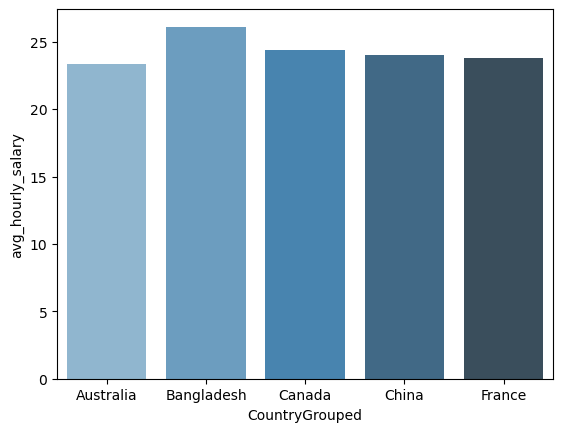

In [165]:
sample_data = grouped_metrics.head(5)
sns.barplot(data=sample_data, x='CountryGrouped', y='avg_hourly_salary', palette='Blues_d')

In [183]:
df.head()

,title,link,publisheddate,ishourly,hourlylow,hourlyhigh,budget,country,CountryGrouped,RemoteWork,averagehourly,year,month,day,is_even_day,job_category
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,15.0,30.0,500.0,United States,United States,Onsite,22.5,2024,2024-02,17,False,Marketing
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,15.0,30.0,1100.0,United States,United States,Onsite,22.5,2024,2024-02,17,False,Technology
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.0,30.0,100.0,United States,United States,Onsite,20.0,2024,2024-02,17,False,App Development
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,True,15.0,30.0,100.0,United States,United States,Onsite,22.5,2024,2024-02,17,False,Marketing
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,False,15.0,30.0,650.0,India,India,Onsite,22.5,2024,2024-02,17,False,Technology
